In [15]:
#https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/ <<====Link Followed for this code



import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as dt
import pickle as cPickle
import gzip
import cv2

num_epochs = 5
num_classes = 10
batch_size = 128
learning_rate = 0.001

DATA_PATH = "/media/khurshed2504/Data/PycharmProjects/ML_temp0"

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)


train_loader = dt.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = dt.DataLoader(dataset=test_dataset, shuffle=False)


class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1,32, 5, 1, padding = 2),
            torch.nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, 5, 1, padding=2),
            torch.nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.dropout = nn.Dropout()

        self.fc1 = nn.Linear(7*7*64, 1000)
        self.fc2 = nn.Linear(1000, 10)


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        # print(out.shape)
        out = out.reshape((-1,64*7*7))
        # print(out.shape)
        out = self.dropout(out)
        out = self.fc1(out)
        out = self.fc2(out)

        return out




model = ConvNet()

lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

total_step = len(train_loader)

costs = []
acc_list = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # Forward prop
        outputs = model(images)
        loss = lossfn(outputs, labels)
        costs.append(loss.item())

        # Backward prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #  Tracking Accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/5], Step [100/469], Loss: 0.1073, Accuracy: 97.66%
Epoch [1/5], Step [200/469], Loss: 0.2578, Accuracy: 94.53%
Epoch [1/5], Step [300/469], Loss: 0.0364, Accuracy: 98.44%
Epoch [1/5], Step [400/469], Loss: 0.1787, Accuracy: 94.53%
Epoch [2/5], Step [100/469], Loss: 0.0997, Accuracy: 97.66%
Epoch [2/5], Step [200/469], Loss: 0.0914, Accuracy: 98.44%
Epoch [2/5], Step [300/469], Loss: 0.0386, Accuracy: 98.44%
Epoch [2/5], Step [400/469], Loss: 0.1190, Accuracy: 96.09%
Epoch [3/5], Step [100/469], Loss: 0.0503, Accuracy: 99.22%
Epoch [3/5], Step [200/469], Loss: 0.0887, Accuracy: 98.44%
Epoch [3/5], Step [300/469], Loss: 0.0361, Accuracy: 98.44%
Epoch [3/5], Step [400/469], Loss: 0.0389, Accuracy: 98.44%
Epoch [4/5], Step [100/469], Loss: 0.0402, Accuracy: 98.44%
Epoch [4/5], Step [200/469], Loss: 0.0337, Accuracy: 98.44%
Epoch [4/5], Step [300/469], Loss: 0.0141, Accuracy: 100.00%
Epoch [4/5], Step [400/469], Loss: 0.0277, Accuracy: 99.22%
Epoch [5/5], Step [100/469], Loss: 0.07

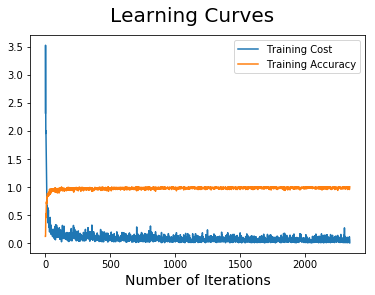

In [16]:
fig = plt.figure()
fig.suptitle('Learning Curves', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.plot(costs, label = 'Training Cost')
plt.plot(acc_list, label = 'Training Accuracy')
plt.legend()
plt.savefig('CNN.png')

In [17]:
model.eval()
for i, (images, labels) in enumerate(test_loader):
    outputs = model(images)
    loss = lossfn(outputs, labels)
    costs.append(loss.item())
    total = labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    acc_list.append(correct / total)
acc = np.mean(np.array(acc_list))
print("Accuracy over Test set is : ",100*acc)

Accuracy over Test set is :  98.81611144862966


In [18]:
#Storing the Model's State Dictionary
# MODEL_STORE_PATH = "/media/khurshed2504/Data/PycharmProjects/ML_temp0/PyTorch Models/MNIST 0"
# torch.save(model.state_dict(),MODEL_STORE_PATH)